1、运行splash

(1)sudo docker run -p 8050:8050 scrapinghub/splash 

(2)浏览器运行localhost:8050

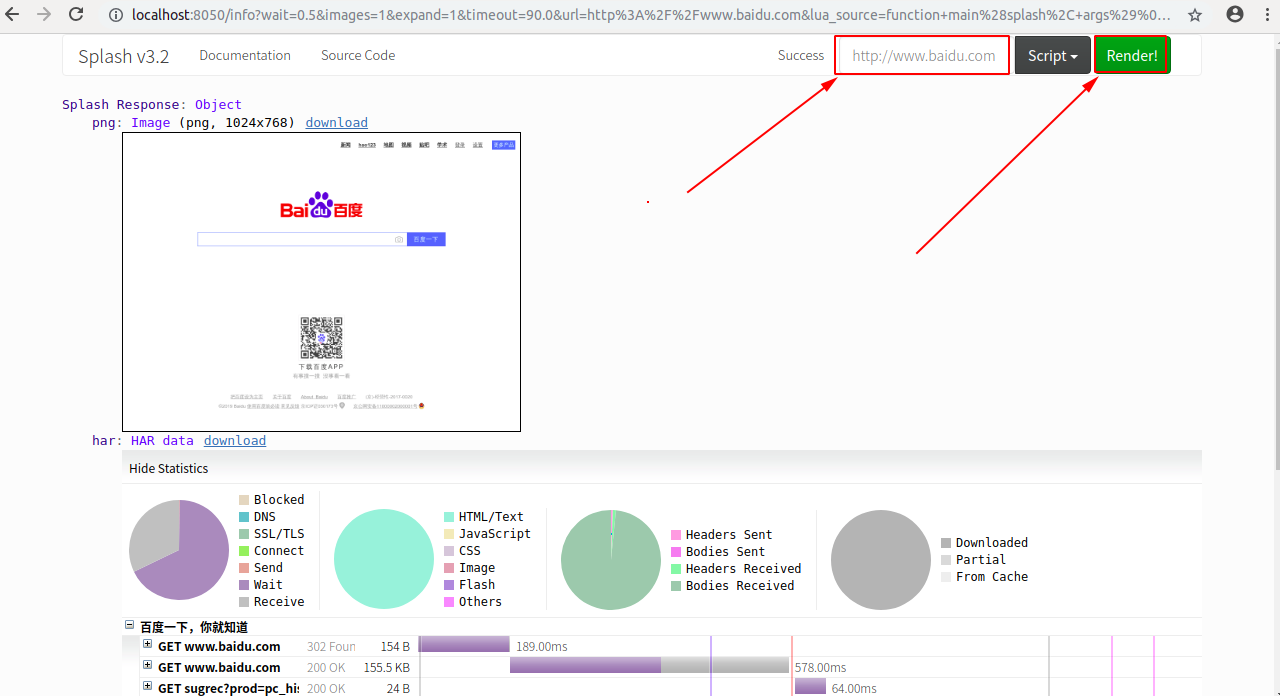

2、Splash Lua 脚本

<code>
function main(splash,args)
  splash:go("https://www.baidu.com")
  splash:wait(0.5)
  local title = splash:evaljs("document.title")
  return {title}
end
</code>

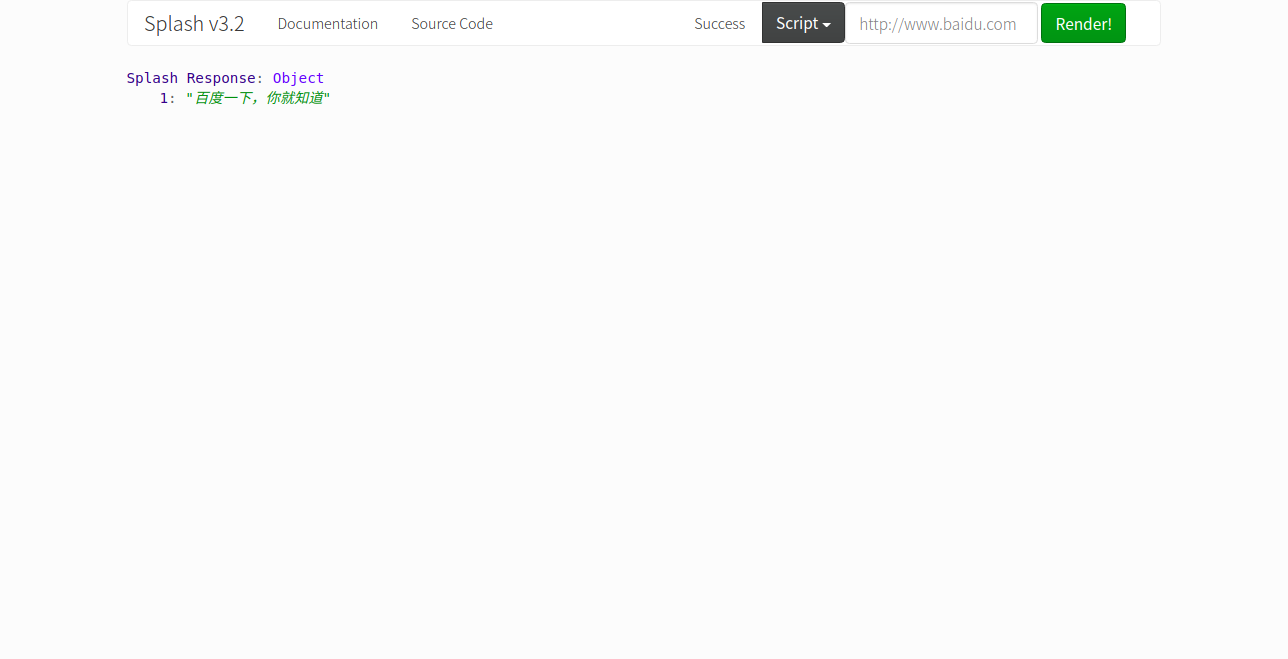

<code>
function main(splash,args)
  local example_urls = {'www.baidu.com','www.taobao.com','www.zhihu.com'}
  local urls = args.urls or example_urls
  local results = {}
  for index, url in ipairs(urls) do
    local ok,reason = splash:go("https://"..url)
    if ok then
      splash:wait(2)
      results[url] = splash:png()
     end
    end
  return results
end
</code>

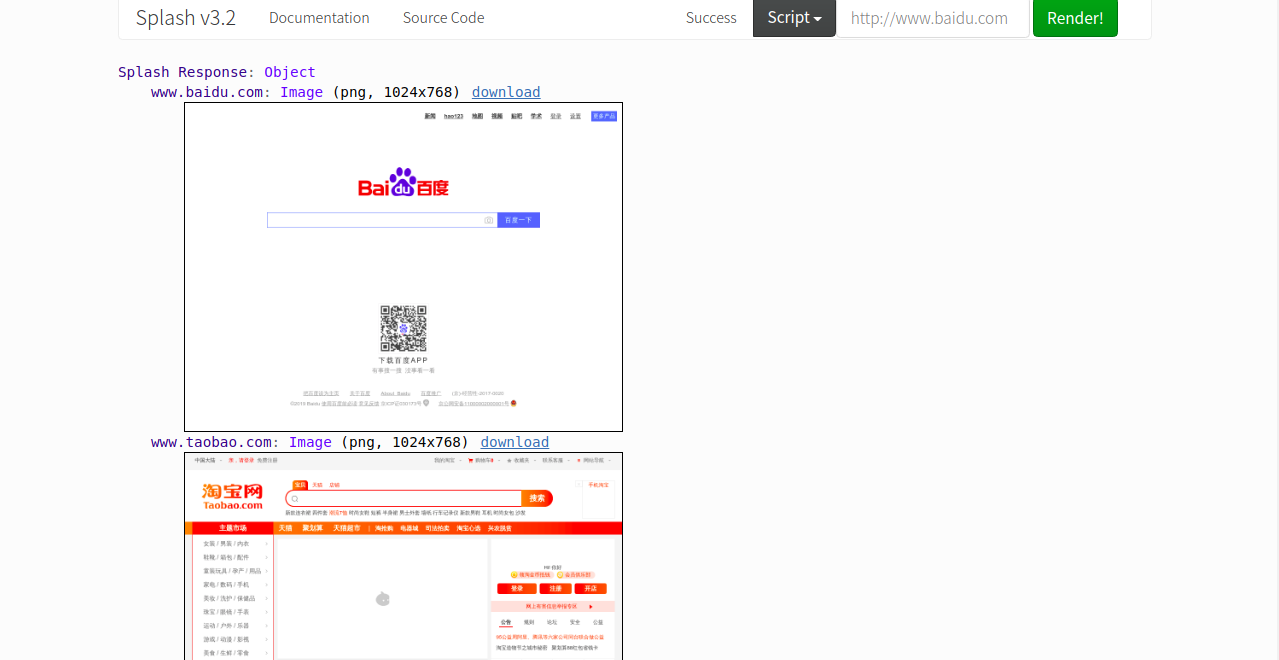

3、Splash对象属性

(1)args:获取加载时配置的参数

(2)js_enabled：Splash的JavaScript执行开关，默认为true

(3)resource_timeout:设置加载的超时时间，单位是秒。

(4)images_enabled:设置图片是否加载，默认是加载的。

(5)plugins_enabled:控制浏览器插件是否开启。默认情况为false，表示不开启。

(6)scroll_position:控制页面上下或者左右滚动。

<code>
function main(splash,args)
  splash:go("https://www.taobao.com")
  splash.scroll_position = {y=200}
  return {png=splash:png()}
end 
</code>

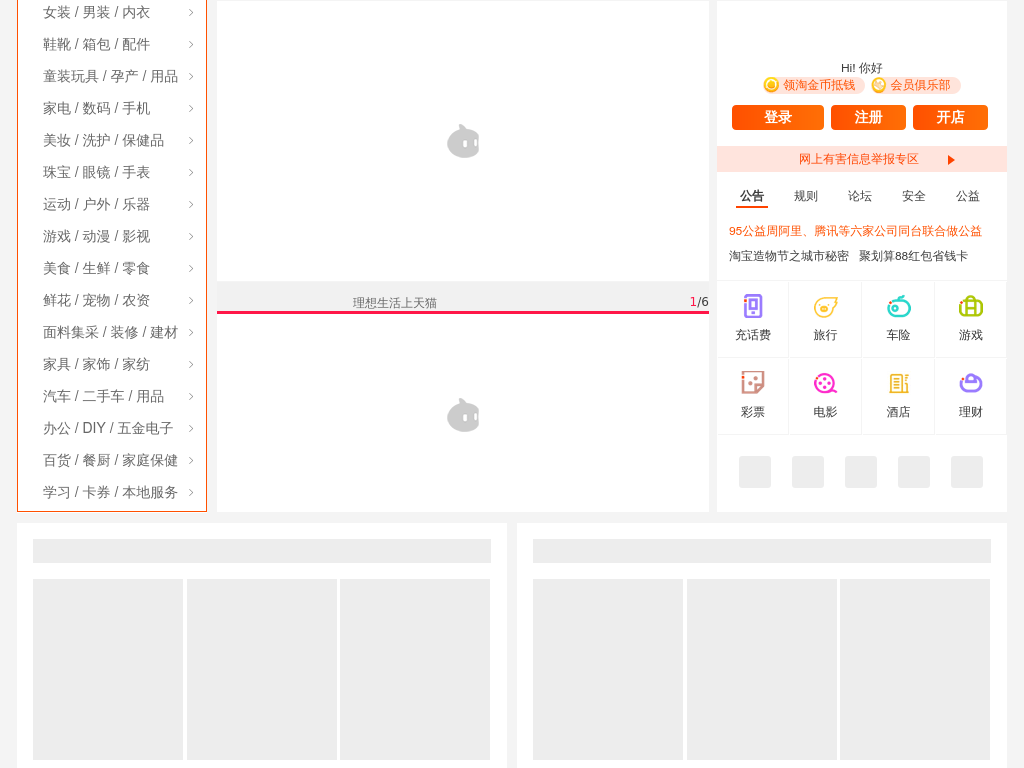

4、Splash对象方法

 (1)go():请求某个链接，可以模拟GET或POST请求，支持传入请求头、表单等数据
 
 (2)wait():可以控制页面等待时间
 
 (3)jsfunc():直接调用js定义的方法，所调用的方法需要用双中括号包围
 
 (4)evaljs():直接执行js代码并返回最后一条js语句的返回结果
 
 (5)runjs():与evaljs()功能类似，但是偏向与执行某些动作或声明某些方法
 
<code>
function main(splash, args)
  splash:go("https://www.baidu.com")
  splash:runjs("foo = function(){return 'I LOVE YOU'}")
  local result = splash:evaljs("foo()")
  return result
end
</code>

(6)autoload():设置每个页面访问时自动加载的对象（只负责加载javascript代码或库，不执行任何操作）

<code>
function main(splash, args)
	splash:autoload([[
    function get_document_title(){
    	return document.title;
  	}
    ]])
  splash:go("https://www.baidu.com")
  return splash:evaljs("get_document_title()")
end    
</code>
autoload()方法也可以加载某些方法库，如jQuery。

(7)call_later():此方法可以通过设置定时任务和延迟时间来实现任务延时执行，并且可以在执行前通过cancle()方法重新执行定时任务。

(8)http_get()：模拟发送http的GET请求

(9)http_post()：模拟发送http的POST请求

(10)set_content():用来设置页面的内容

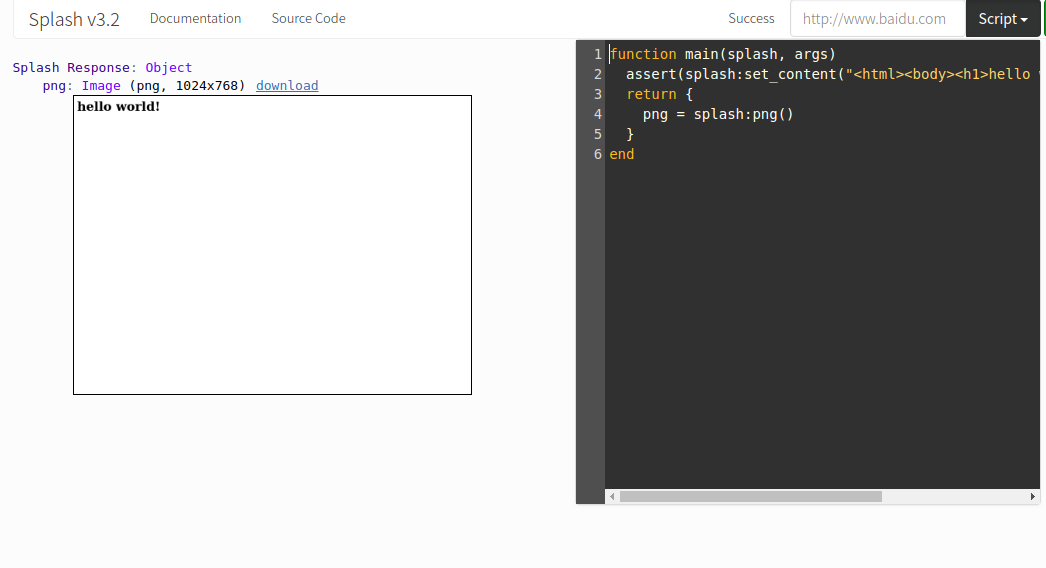

(11)html():获取网页的源代码

(12)png():获取PNG格式的网页截图

(13)jpeg():获取JPEG格式的网页截图

(14)har():获取网页加载过程描述

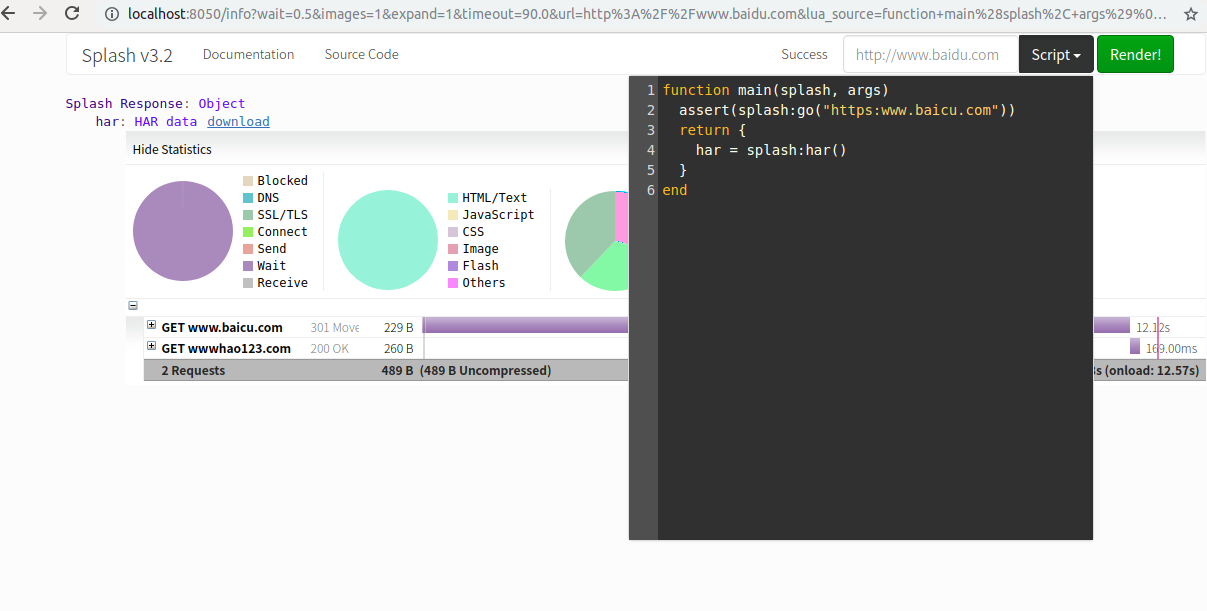

(15)url():获取当前正在访问的URL

(16)get_cookies():获取当前页面的cookies

(17)add_cokie():为当前页面添加Cookie

(18)clear_cookies():清除所有的cookies

(19)get_viewport_size():获取当前浏览器页面大小（宽高）

(20)set_viewport_size():设置当前浏览器页面的大小（宽高）

(21)set_viewport_full():设置浏览器全屏显示
<code>
function main(splash, args)
  splash:go("https:www.baidu.com")
  local wsize,hsize = splash:get_viewport_size()
  splash:set_viewport_size(400,700)
  splash:go("https:www.baidu.com")
  local wrsize,hrsize = splash:get_viewport_size()
  return {
    wsize = wsize,
    hsize = hsize,
    wrsize = wrsize,
    hrsize = hrsize
  }
end
</code>
(22)set_url_agent():设置浏览器的URL-Agent

(23)set_custom_headers():设置请求头

(24)select():选中符合条件的第一个节点，如果有多个节点符合条件，只会返回其中一个，参数时CSS选择器

<code>
function main(splash, args)
  splash:set_viewport_full()
  splash:go("https://world.taobao.com")
  input = splash:select("#mq")
  input:send_text("python")
  splash:wait(3)
  return splash:png()
end
</code>

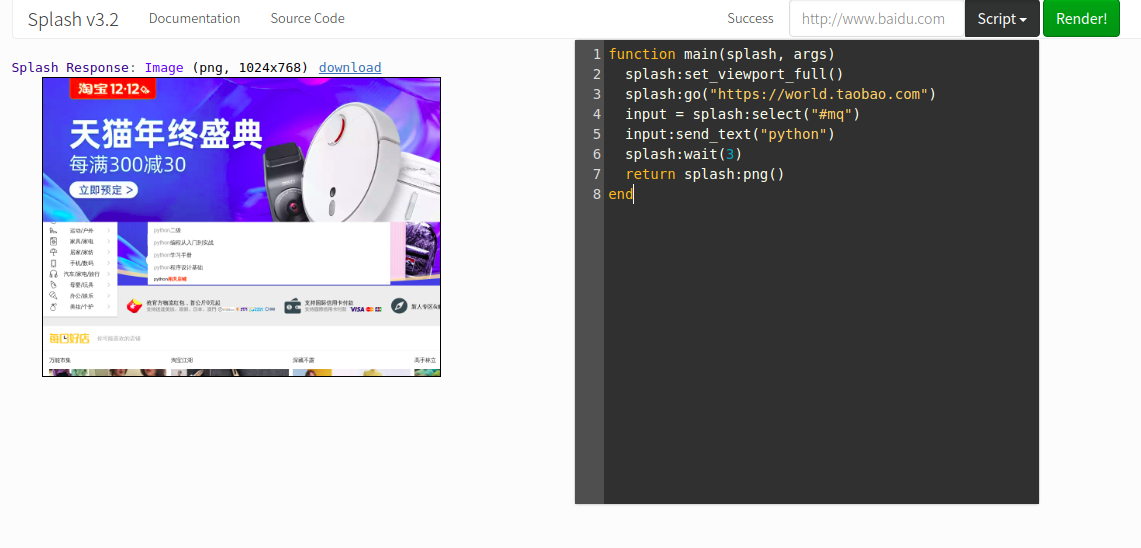

(25)select_all():可以选中所有符合条件的节点，参数为CSS选择器
<code>
function main(splash, args)
  local treat = require("treat")
  assert(splash:set_viewport_full())
  assert(splash:go("http://quotes.toscrape.com/"))
  assert(splash:wait(1))
  local texts = splash:select_all(".quote .text")
  local results = {}
  for index, text in ipairs(texts) do
    results[index] = text.node.innerHTML
  end
  return treat.as_array(results)
end
</code>

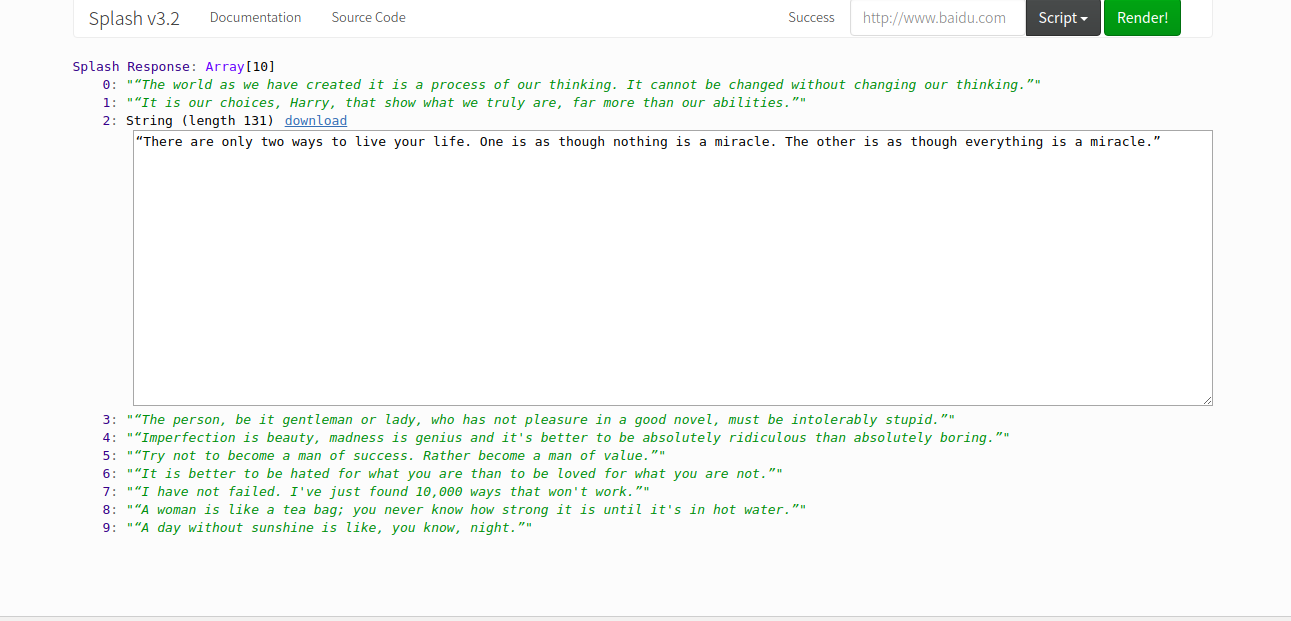

(26)mouse_click():模拟鼠标点击操作，传入的参数为坐标值x,y。此外也可以利用CSS选择器直接选中某个节点，然后调用此方法。
<code>
function main(splash, args)
  splash:set_viewport_full()
  splash:go("https://www.baidu.com/")
  input = splash:select("#kw")
  input:send_text("python")
  submit = splash:select("#su")
  splash:wait(3)
  submit:mouse_click()
  splash:wait(3)
  return splash:png()
end
</code>

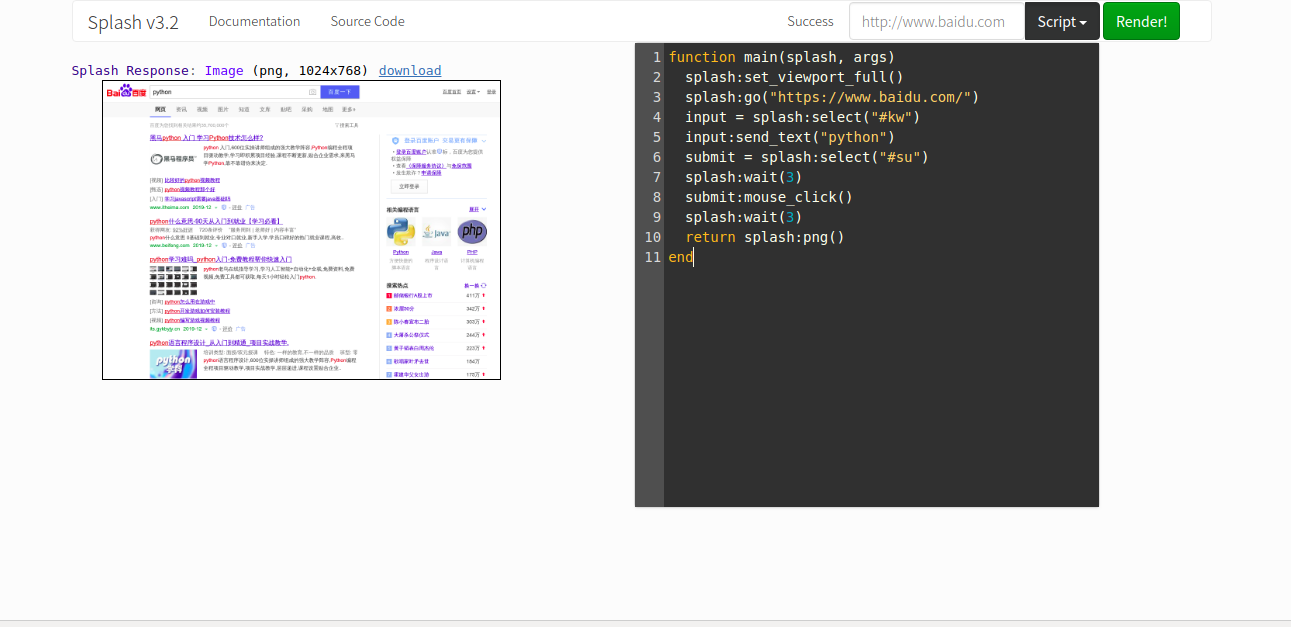

5、Splash API调用

+ render.html:此接口用于获取JavaScript渲染的页面的HTML代码，接口地址就是Splash的运行地址加此接口名称,例如：http://localhost:8050/render.html

In [1]:
import requests

url = 'http://localhost:8050/render.html?url=https://www.baidu.com'
response = requests.get(url)
print(response.text)

<!DOCTYPE html><!--STATUS OK--><html><head>
    
    <meta http-equiv="content-type" content="text/html;charset=utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=Edge">
	<meta content="always" name="referrer">
    <meta name="theme-color" content="#2932e1">
    <link rel="shortcut icon" href="/favicon.ico" type="image/x-icon">
    <link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索">
    <link rel="icon" sizes="any" mask="" href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg">
	
	
	<link rel="dns-prefetch" href="//s1.bdstatic.com">
	<link rel="dns-prefetch" href="//t1.baidu.com">
	<link rel="dns-prefetch" href="//t2.baidu.com">
	<link rel="dns-prefetch" href="//t3.baidu.com">
	<link rel="dns-prefetch" href="//t10.baidu.com">
	<link rel="dns-prefetch" href="//t11.baidu.com">
	<link rel="dns-prefetch" href="//t12.baidu.com">
	<link rel="dns-prefetch" href="//b1.bdstatic.com">
    
    <title>百度一下，你就知道</title>
  

+ render.png:此接口可以获取网页截图，参数需要设置图片的宽高，返回值时PNG格式的二进制数据，例如：http://localhost:8050/render.png?url=https://www.baidu.com&wait=5&width=1000&height=700

In [2]:
import requests

url = 'http://localhost:8050/render.png?url=https://www.baidu.com&wait=5&width=1000&height=700'
response = requests.get(url)
with open("baidu.png",'wb') as f:
    f.write(response.content)

+ render.jpeg:此接口与render.png接口类似，可以获取网页截图，参数需要设置图片的宽高，返回值时JPEG格式的二进制数据

+ render.har:此接口用于获取页面加载的HAR数据，例如：http://localhost:8050/render.har?url＝https://world.taobao.com&wait=5 。返回结果非常多，是一个JSON个数的数字键，其中包含页面加载过程中的HAR数据。

In [10]:
import requests

url = 'http://localhost:8050/render.har?url=https://world.taobao.com&wait=5'
response = requests.get(url)
#print(response.json())
print(response.text)

{"log": {"browser": {"comment": "PyQt 5.9, Qt 5.9.1", "version": "602.1", "name": "QWebKit"}, "creator": {"version": "3.2", "name": "Splash"}, "entries": [{"cache": {}, "response": {"content": {"mimeType": "text/html; charset=utf-8", "size": 0}, "redirectURL": "", "ok": true, "statusText": "Not Modified", "httpVersion": "HTTP/1.1", "status": 304, "url": "https://world.taobao.com/", "headersSize": 917, "headers": [{"value": "Tengine", "name": "Server"}, {"value": "text/html; charset=utf-8", "name": "Content-Type"}, {"value": "keep-alive", "name": "Connection"}, {"value": "Tue, 10 Dec 2019 03:46:23 GMT", "name": "Date"}, {"value": "Origin, Ali-Detector-Type, Ip-Country-Id, Ali-Hng, X-Host", "name": "Vary"}, {"value": "28c3d6b2523ca52cb704b8b5dcd976772fac0fd47f30cf9ba5598adfe20c811f8bb00e660f25c2b1", "name": "x-server-id"}, {"value": "max-age=0, s-maxage=137", "name": "Cache-Control"}, {"value": "W/\"60199-Tzu0ls24JVxD973WJIMIWSlFrkQ\"", "name": "ETag"}, {"value": "51", "name": "x-readtim

+ render.json:此接口包含了前面接口的所有功能，返回结果是JSON格式,可以传入不同的参数控制其返回结果（如果传入html=1，返回结果即会增加源代码数据）：
<code>
curl http://localhost:8050/render.json?url=https://world.taobao.com&html=1&har=1&png=1
</code>

+ excute:此接口可以实现与Lua脚本的对接，用于实现交互操作

In [36]:
import requests
from urllib.parse import quote

lua = '''
function main(splash, args)
  splash:go("http://www.baidu.com")
  return splash:html()
end
'''
url = 'http://localhost:8050/execute?lua_source=' + quote(lua)
print(url)
headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}
response = requests.get(url,headers=headers)
print(response.status_code)
print(response.text)

http://localhost:8050/execute?lua_source=%0Afunction%20main%28splash%2C%20args%29%0A%20%20splash%3Ago%28%22http%3A//www.baidu.com%22%29%0A%20%20return%20splash%3Ahtml%28%29%0Aend%0A
504
{"error": 504, "type": "GlobalTimeoutError", "info": {"timeout": 30}, "description": "Timeout exceeded rendering page"}
